In [1]:
# cd /Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe

/Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe


In [2]:
cd /Users/jackdesmarais/Documents/berkeley/SavageLab/scripts/tecantaloupe

/Users/jackdesmarais/Documents/berkeley/SavageLab/scripts/tecantaloupe


In [3]:
from matplotlib import pyplot as plt
import matplotlib

/Users/jackdesmarais/Documents/berkeley/SavageLab/scripts/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


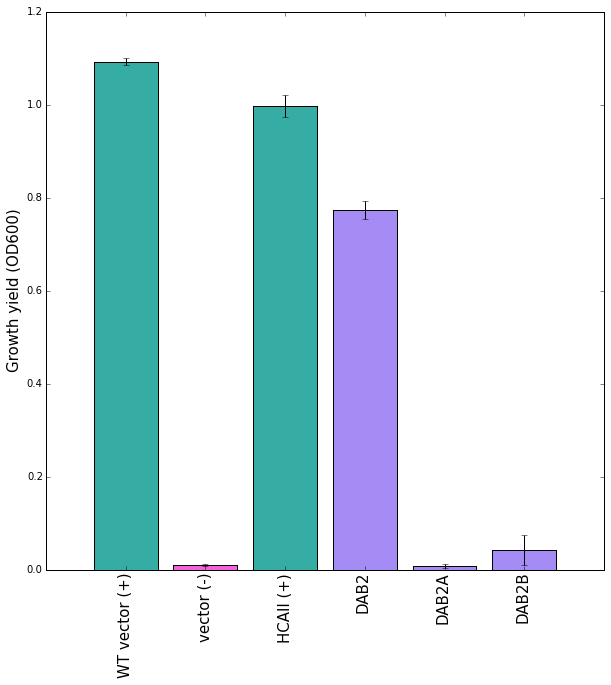

In [4]:
# Making Panel B
%matplotlib inline
def makePanelB(ax):
    import pandas as pd
    import numpy as np
    import seaborn
    import itertools

    from growth.plate_spec import PlateSpec
    from growth.plate_time_course_parser import SavageLabM1000Excel
    from matplotlib import pyplot as plt
    
    import seaborn as sns
    colors=sns.color_palette('husl',8)
    pCol=colors[4]
    nCol=colors[7]
    eCol=colors[6]

    # PlateSpec defined in CSV for easy editing
    ps = PlateSpec.FromFile('growth/plate_specs/2018_02_07_operon1CAFreeKnockInGrowth_metalKO_nice.csv')
    name_mapping = ps.well_to_name_mapping()

    parser = SavageLabM1000Excel()
    timecourse = parser.ParseFromFilename('growth/data/2018_02_09_CAFree_operon1_rescue_experiment_metal_KO_later.xlsx')

    blanked = timecourse.blank()
    # You can blank each well against it's own early timepoints
    # by not setting blank_wells

    # Smooth with default params.
    smoothed = blanked.smooth()

    means = smoothed.mean_by_name(ps)
    sems = smoothed.sem_by_name(ps)

    mean_OD = means.data_for_label('abs600')
    sems_OD = sems.data_for_label('abs600')

    to_plot = [
        ('bw+pFE-sfGFP+atc', 'WT vector (+)'),
        ('CAF+pFE-sfGFP+atc', 'vector (-)'),
        ('CAF+pFE-HCA2+atc', 'HCAII (+)'),
        ('CAF+pFE-DAB2_wt+atc', 'DAB2'),
        ('CAF+pFE-NDH+atc', 'DAB2A'),
        ('CAF+pFE-DUF+atc', 'DAB2B'),]
    
    
    yld = smoothed.GrowthYield(density_label='abs600')
    name2well = ps.name_to_well_mapping()

    yld = pd.DataFrame(yld, index=['yield']).T
    grouped_yld = yld.groupby(ps.well_to_name_mapping())
    mean_yield = grouped_yld.mean()
    std_yield = grouped_yld.std()
    
    labels = [t[1] for t in to_plot]
    ylds = [mean_yield.loc[t[0]][0] for t in to_plot]
    stds = [std_yield.loc[t[0]][0] for t in to_plot]
    
    ax.bar(range(len(ylds)),ylds,yerr=stds,color=[pCol,nCol,pCol,eCol,eCol,eCol],align='center',ecolor='k')
    plt.ylabel('Growth yield (OD600)',fontsize=15)
    plt.xticks(range(len(ylds)),labels,rotation=90,fontsize=15)

    
fig,ax = plt.subplots(figsize=(10,10))
makePanelB(ax)
plt.show()

/usr/local/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)
/Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


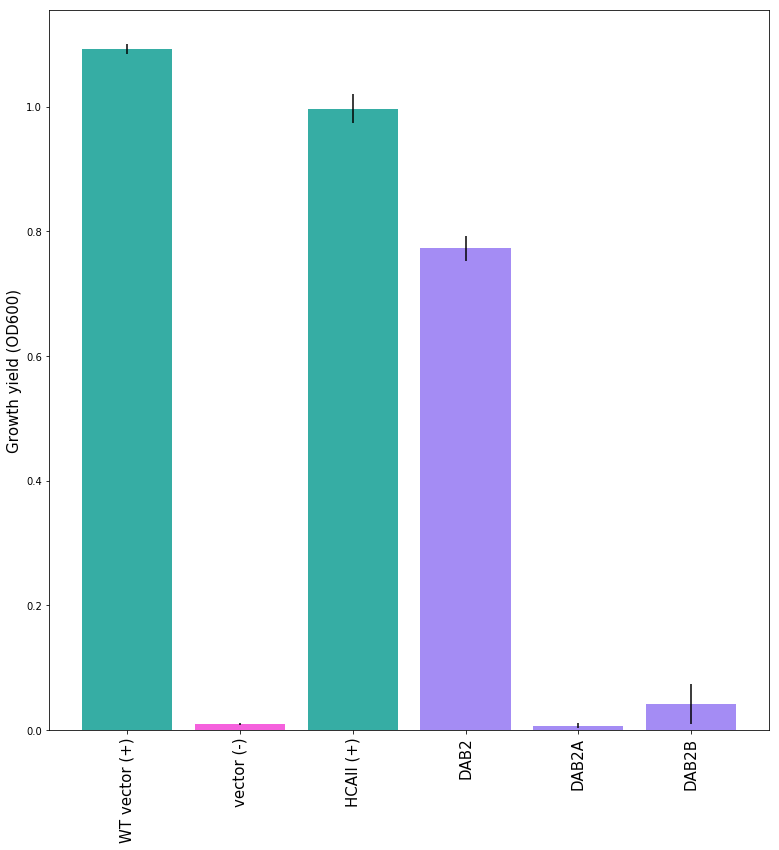

In [10]:
fig = plt.figure(figsize=(10,10),frameon=False)

panelB = fig.add_axes([0,0,1,1])
makePanelB(panelB)
# plt.annotate('B',[0,0.55],xycoords='figure fraction',fontsize=15)

plt.tight_layout()

plt.savefig('/Volumes/Shared/data/Jack/SavageLab/scripts/FigureMakingForBarseqDABPaper/figS2Draft.svg',
           format='svg',bbox_inches='tight')
plt.savefig('/Volumes/Shared/data/Jack/SavageLab/scripts/FigureMakingForBarseqDABPaper/figS2Draft.png',
           format='png',bbox_inches='tight')

**Figure 3 Inorganic Carbon transporters isolated in the screen function in E. coli** *(a)* operon diagrams of two inorganic carbon transorters DAB1 and DAB2. Asterisks show predicted active sie residues. Genes labeld A are membrane proteins with predicted homology to Mrp cation antiporters and NDH proton translocating subunits. *(b)* CAFree E. coli do not grow in air unless rescued with a CA or Ci transporter. DAB2 rescues, but it's active site mutant does not. *(c)* 14Ci uptake of CAFree cells increases when transformed with a CA or transporter. DAB2 also increases uptake